# Algorithm 5

In [1]:
from trajectory_generator import *
from functions import *
import numpy as np
import matplotlib.pyplot as plt
from cmap import Colormap
from scipy.special import comb
from scipy import integrate
from scipy import special
from itertools import combinations_with_replacement
from collections import Counter

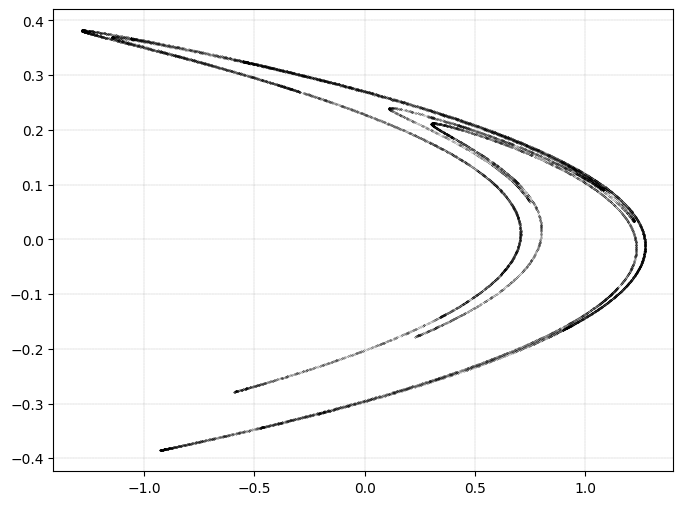

In [2]:
def henon(x, a=1.4, b=0.3):
  return np.array([x[1] + 1 - a*x[0]**2, b*x[0]])
  
def compute_henon_fixed_pts(a=1.4, b=0.3):
  return np.array([[(b-1 + np.sqrt((b-1)**2+4*a))/(2*a), b*(b-1 + np.sqrt((b-1)**2+4*a))/(2*a)],
                    [(b-1 - np.sqrt((b-1)**2+4*a))/(2*a), b*(b-1 - np.sqrt((b-1)**2+4*a))/(2*a)]]).T
  
attractor_henon=np.zeros((2, 20000))
for i in range(20000-1):
  attractor_henon[:,i+1] = henon(attractor_henon[:,i])
  
ax=plt.figure(figsize=(8,6)).add_subplot()
ax.grid(True, linestyle='--', color='k', linewidth=0.1)
ax.scatter(attractor_henon[0,100:], attractor_henon[1,100:], 0.1,'k', '.', alpha=0.5)
plt.show()

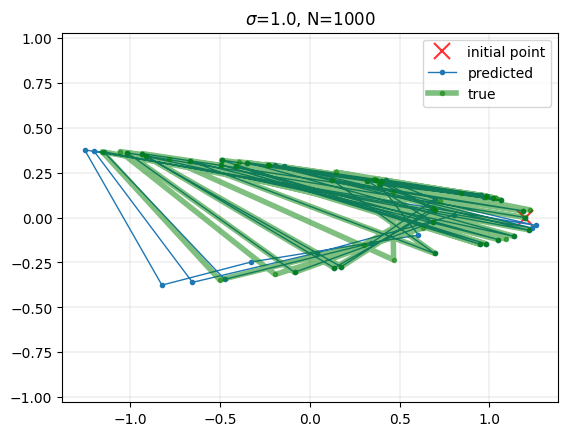

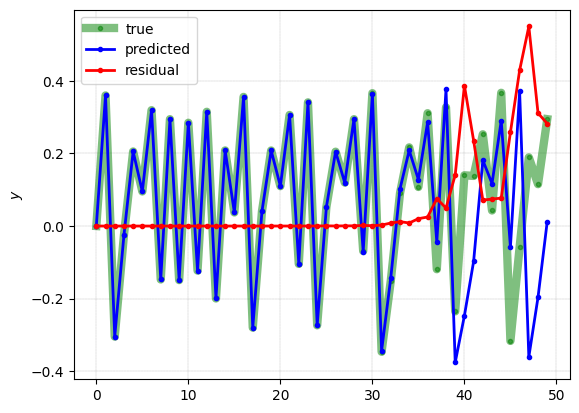

In [3]:
#Data driven reconstruction of Henon map from data of N=1000 pairs of 
#the uniformly sampled points from [-1,1]^2 and their images under the Henon map 

d = 2 # dimension
m = 3
n = 20
rm = comb(m+d,d, exact = True) # dimension of V_{p,m}
rn = comb(n+d,d, exact = True) # dimension of V_{p,n}
N = 1000 # number of sample

#data
width = 1
X=2*width*np.random.rand(d,N)-width #uniformly distribtuion from [-width, width]^2
Y=henon(X) 

# select (x_0, y_0); we take the one closest to the mean of the data
idx0 = np.argmin(np.sum(np.abs(X-X.mean(axis=1, keepdims=True))), axis=0)
x0=X[:,[idx0]]
y0=Y[:,[idx0]]
Y = Y - y0 + x0 #Y-tilde

# Computation of V_n^X and W_m^{X,Y}
sigma_kernel = 1.0 #sigma
VnX = constV_exp(X, x0, n, sigma_kernel) # V_n^X
VmY = constV_exp(Y, x0, m, sigma_kernel) # V_m^{Y_tilde}

#Computation of C-hat
C = (VmY@(np.linalg.pinv(VnX)))[:,:rm]

def f_pred(x):
  return sigma_kernel*(C[1:d+1,:])@(constV_exp(x ,x0, m, sigma_kernel)) + y0

# Figure for trajectries
x_init = np.array([[1.2,0]]).T # initial points

T = 50 # time period
t_axis=np.arange(T)
Z_predicted=np.zeros(x_init.shape + (T,))#predicted trajectories
Z_exact=np.zeros(x_init.shape + (T,)) #true trajectories
Z_predicted[...,0]=x_init
Z_exact[...,0]=x_init
for i in range(T-1):
  Z_predicted[...,i+1] = f_pred(Z_predicted[...,i])
  Z_exact[...,i+1] = henon(Z_exact[...,i])


# graph of trajectories
ax=plt.figure().add_subplot()
ax.grid(True, linestyle='--', color='k', linewidth=0.1)
ax.plot(x_init[0,:], x_init[1,:], 'x', c='r', markersize=12, markeredgewidth=1.5, alpha=0.8, label='initial point')
ax.plot(Z_predicted[0,0,:],  Z_predicted[1,0,:], '.-', linewidth=1, label = 'predicted', alpha=1)
ax.plot(Z_exact[0,0,:],  Z_exact[1,0,:],  'g.-', linewidth=4, label='true', alpha=0.5)
ax.axis("equal")
ax.set_title(f'$\sigma$={sigma_kernel}, N={N}')
ax.legend()

# graph of y-axis of trajectories
ax=plt.figure().add_subplot()
ax.grid(True, linestyle='--', color='k', linewidth=0.1)
ax.plot(t_axis,Z_exact[1,0,:], '.-', label='true', linewidth=6, alpha=0.5, color='green')
ax.plot(t_axis,Z_predicted[1,0,:],  '.-',label='predicted',linewidth=2, color='blue')
ax.plot(t_axis,np.abs(Z_exact[1,0,:]-Z_predicted[1,0,:]), '.-', label='residual', linewidth=2, color='red')
ax.set_ylabel('$y$')
ax.legend()
plt.show()
